In [2]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (14, 10)

# from pandas_utils import load_data, join_timestamp_per_gps_info
from pandas_utils import USE_GET_COLUMNS, USE_REQ_COLUMNS, DSME_WORK_STATION
from location_utils import check_gps_in_area
from shapely.geometry import Point, Polygon, mapping

### 데이터 불러오기

In [3]:
DATA_DIR = "data/고소차 Data/tele_car_get"
filename = DATA_DIR + "/11월~03월_use_data.csv"
df = pd.read_csv(filename, encoding='utf-8')
df

,Unnamed: 0,eqp_id,gps_lat,gps_lon,timestamp,is_generator_on
0,0,N-229,34.878154,128.703939,2020-01-01 00:00:00,False
1,1,N-313,34.873291,128.718685,2020-01-01 00:00:00,False
2,2,N-630,34.877161,128.709587,2020-01-01 00:00:02,False
3,3,N-499,34.873604,128.700586,2020-01-01 00:00:03,False
4,4,N-576,34.873706,128.718115,2020-01-01 00:00:03,False
...,...,...,...,...,...,...
14642100,3119019,N-347,34.877063,128.705990,2019-12-31 23:59:57,False
14642101,3119020,N-414,34.876693,128.704704,2019-12-31 23:59:57,False
14642102,3119021,N-618,34.875948,128.701888,2019-12-31 23:59:58,True
14642103,3119022,N-229,34.878154,128.703939,2020-01-01 00:00:00,False


In [4]:
for col in df.columns:
    print (col, ": ", sum(df[col].isna()), ' / ', len(df))

Unnamed: 0 :  0  /  14642105
eqp_id :  326670  /  14642105
gps_lat :  0  /  14642105
gps_lon :  0  /  14642105
timestamp :  0  /  14642105
is_generator_on :  0  /  14642105


### DSME YARD 이외로 튀는 좌표 걸러내기

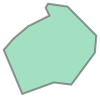

In [6]:
dsme_work_station = Polygon(DSME_WORK_STATION)
dsme_work_station

In [14]:
available_gps = []
for y, x in tqdm(df[['gps_lat', 'gps_lon']].values):
    available_gps.append(check_gps_in_area(y, x, dsme_work_station))

100%|████████████████████████████████████████████████████| 14642105/14642105 [10:47<00:00, 22628.47it/s]


In [15]:
print('유효 gps : {}개 \n무효 gps : {}개'.format(available_gps.count(True), available_gps.count(False)))

유효 gps : 14633860개 
무효 gps : 8245개


In [17]:
df = df[available_gps]

In [21]:
start_end_df = df.groupby(['eqp_id'])['timestamp'].agg(start_timestamp='min', end_timestamp='max').reset_index()
start_end_df

,eqp_id,start_timestamp,end_timestamp
0,N-182,2019-11-12 08:21:36,2020-03-18 23:58:23
1,N-183,2019-11-05 09:23:08,2020-03-18 23:59:19
2,N-185,2019-11-01 00:01:49,2020-03-18 23:58:16
3,N-200,2019-11-01 00:01:54,2020-03-18 23:59:14
4,N-225,2019-11-01 00:01:47,2020-03-18 23:59:03
...,...,...,...
231,N-643,2019-11-01 00:00:04,2020-03-18 23:59:31
232,N-646,2019-11-01 00:01:57,2020-03-18 23:59:39
233,N-647,2019-11-01 00:01:44,2020-03-18 23:37:32
234,N-648,2020-01-29 08:45:24,2020-03-18 23:58:17


In [22]:
df.to_csv("11월~03월_use_data2.csv")